In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files = [file for file in os.listdir('C:/Users/Dell/Desktop/Real world project/Sales Data Analysis/Sales_Data')]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
path = "C:/Users/Dell/Desktop/Real world project/Sales Data Analysis/Sales_Data"

#blank dataframe
Master_data = pd.DataFrame()

for file in files:
    current_df = pd.read_csv(path+"/"+file)
    Master_data = pd.concat([Master_data, current_df])
    
Master_data.shape

(186850, 6)

In [17]:
# Export to CSV file

In [4]:
Master_data.to_csv('C:/Users/Dell/Desktop/Real world project/Sales Data Analysis/Sales_Data/Master_data.csv',index=False)

In [5]:
Master_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
Master_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
Master_data = Master_data.dropna(how='all')

In [8]:
Master_data.shape

(186305, 6)

In [9]:
# Which is best month in terms of sale

In [10]:
'04/19/19 08:46'.split('/')

['04', '19', '19 08:46']

In [11]:
# for separating month

In [12]:
'04/19/19 08:46'.split('/')[0]

'04'

In [13]:
# how to add month column

In [14]:
def month(x):
    return x.split('/')[0]

In [15]:
Master_data['month']=Master_data['Order Date'].apply(month)

In [16]:
Master_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [17]:
Master_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [19]:
# Convert object to Integer
Master_data['month']=Master_data['month'].astype(int)

ValueError: invalid literal for int() with base 10: 'Order Date'

In [20]:
Master_data['month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [21]:
filter=Master_data['month']=='Order Date'
len(Master_data[~filter])


185950

In [28]:
Master_data=Master_data[~filter]

C:\Users\Dell\.conda\envs\rstudio\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


ValueError: cannot reindex from a duplicate axis

In [25]:
Master_data.shape

(185950, 7)

In [26]:
Master_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [27]:
Master_data['month']=Master_data['month'].astype(int)

In [64]:
# to confirm data type has changed into integer
Master_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month                int32
dtype: object

In [71]:
Master_data['Quantity Ordered']=Master_data['Quantity Ordered'].astype(int)

In [72]:
Master_data['Price Each']=Master_data['Price Each'].astype(float)

In [73]:
Master_data['Sales']=Master_data['Quantity Ordered']*Master_data['Price Each']

In [76]:
Master_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,4,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,4,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,4,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,4,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,4,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [83]:
# Group By function 
Master_data.groupby('Product')['Sales'].sum()

Product
20in Monitor                    908297.42
27in 4K Gaming Monitor         4870195.12
27in FHD Monitor               2264849.00
34in Ultrawide Monitor         4711116.02
AA Batteries (4-pack)           212236.80
AAA Batteries (4-pack)          185481.66
Apple Airpods Headphones       4698300.00
Bose SoundSport Headphones     2691130.86
Flatscreen TV                  2891400.00
Google Phone                   6638400.00
LG Dryer                        775200.00
LG Washing Machine              799200.00
Lightning Charging Cable        694188.30
Macbook Pro Laptop            16075200.00
ThinkPad Laptop                8259917.40
USB-C Charging Cable            573002.50
Vareebadd Phone                1654400.00
Wired Headphones                492956.86
iPhone                         9588600.00
Name: Sales, dtype: float64

In [129]:
Master_data.groupby('month')['Sales'].sum()

month
1     3644513.46
2     4404044.84
3     5614200.76
4     6781340.48
5     6305213.50
6     5155604.52
7     5295551.52
8     4488935.76
9     4195120.26
10    7473453.76
11    6399206.40
12    9226886.68
Name: Sales, dtype: float64

<AxesSubplot:xlabel='month'>

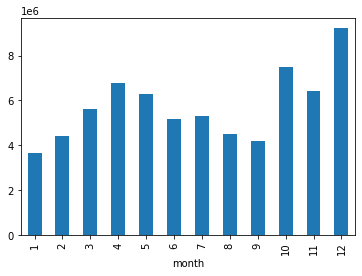

In [130]:
Master_data.groupby('month')['Sales'].sum().plot.bar()

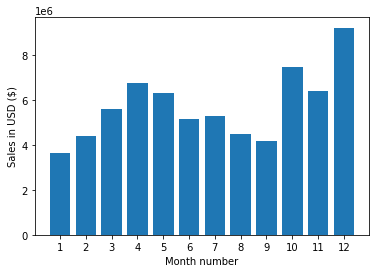

In [102]:
# Plot Bar chart for sales
month=range(1,13)
plt.bar (month,Master_data.groupby('month')['Sales'].sum())
plt.xticks(month)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [104]:
# Which city has most orders

In [105]:
'917 1st St, Dallas, TX 75001'.split(',')

['917 1st St', ' Dallas', ' TX 75001']

In [107]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [109]:
# Now we add city column to  the master data

In [113]:
def City(x):
    return x.split(',')[1]

In [116]:
Master_data['City'] = Master_data['Purchase Address'].apply(City)

In [119]:
Master_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,4,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,4,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,4,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,4,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,4,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [122]:
Master_data.groupby('City')['City'].count()

City
 Atlanta          29762
 Austin           19810
 Boston           39868
 Dallas           29640
 Los Angeles      59210
 New York City    49752
 Portland         24930
 San Francisco    89464
 Seattle          29464
Name: City, dtype: int64

<AxesSubplot:xlabel='City'>

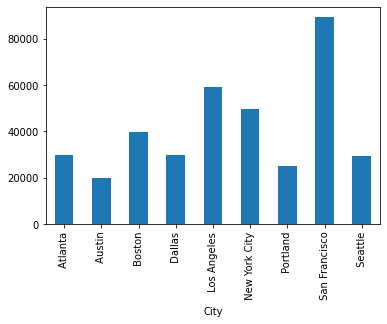

In [125]:
# Plot Bar chart for orders by cities
Master_data.groupby('City')['City'].count().plot.bar()

In [133]:
# Maximam selling Product

In [141]:
Master_data.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   8258
27in 4K Gaming Monitor        12488
27in FHD Monitor              15100
34in Ultrawide Monitor        12398
AA Batteries (4-pack)         55270
AAA Batteries (4-pack)        62034
Apple Airpods Headphones      31322
Bose SoundSport Headphones    26914
Flatscreen TV                  9638
Google Phone                  11064
LG Dryer                       1292
LG Washing Machine             1332
Lightning Charging Cable      46434
Macbook Pro Laptop             9456
ThinkPad Laptop                8260
USB-C Charging Cable          47950
Vareebadd Phone                4136
Wired Headphones              41114
iPhone                        13698
Name: Quantity Ordered, dtype: int32

<AxesSubplot:xlabel='Product'>

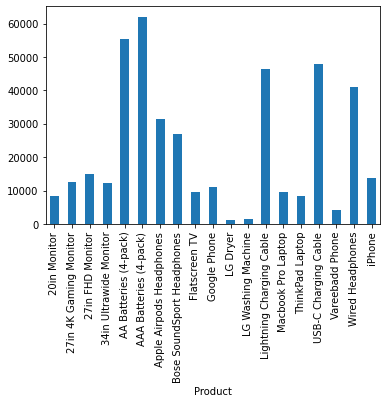

In [142]:
Master_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [ ]:
# TO find if there is relation between Price of the product and sales

In [139]:
Master_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [144]:
products=Master_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=Master_data.groupby('Product')['Quantity Ordered'].sum()
prices=Master_data.groupby('Product')['Price Each'].mean()

C:\Users\Dell\.conda\envs\rstudio\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2880x1728 with 0 Axes>

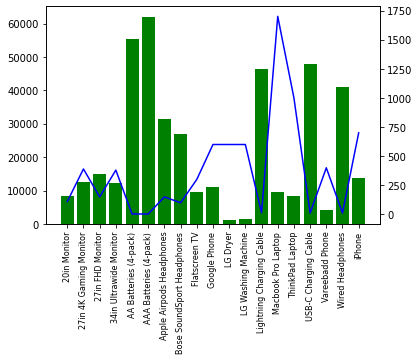

In [146]:
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show